In [2]:
import yfinance as yf
import pandas as pd


# Retrieve BTC data
df = yf.download('BTC-USD', start='2017-11-01', end='2023-01-31')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-01,6440.970215,6767.310059,6377.879883,6767.310059,6767.310059,2870320128
2017-11-02,6777.770020,7367.330078,6758.720215,7078.500000,7078.500000,4653770240
2017-11-03,7087.529785,7461.290039,7002.939941,7207.759766,7207.759766,3369860096
2017-11-04,7164.479980,7492.859863,7031.279785,7379.950195,7379.950195,2483800064
2017-11-05,7404.520020,7617.479980,7333.189941,7407.410156,7407.410156,2380410112


In [3]:
# Split data into training and testing sets
train_data = df.loc[:'2022-12-31']
test_data = df.loc['2023-01-01':]

In [9]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Create target variable
train_data['target'] = train_data['Close'].shift(-1)
train_data.dropna(inplace=True)

# Split training data into input and output variables
X = train_data.drop('target', axis=1)
y = train_data['target']

# Split input and output variables into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Find top three algorithms
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Check the Result
models

100%|██████████| 42/42 [06:04<00:00,  8.68s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HuberRegressor,1.00,1.00,962.81,0.05
Ridge,1.00,1.00,964.89,0.01
Lars,1.00,1.00,965.00,0.02
LinearRegression,1.00,1.00,965.00,0.01
TransformedTargetRegressor,1.00,1.00,965.00,0.01
BayesianRidge,1.00,1.00,965.06,0.01
RidgeCV,1.00,1.00,965.21,0.02
LassoLarsCV,1.00,1.00,966.10,0.02
OrthogonalMatchingPursuitCV,1.00,1.00,966.84,0.02


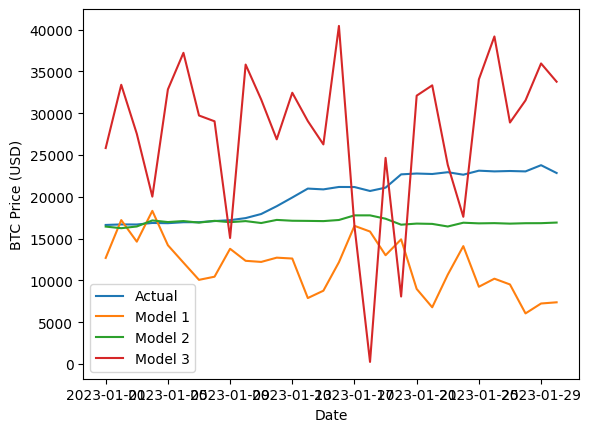

In [10]:
# Split data into train and test sets
X_train = X[:-30]
X_test = X[-30:]
y_train = y[:-30]

# Predict with top 3 models
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lars

model1 = HuberRegressor()
model2 = Ridge()
model3 = Lars()

models = [model1, model2, model3]
predictions = []

for model in models:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    predictions.append(preds)

# Plot actual and predicted prices
import matplotlib.pyplot as plt

actual_prices = test_data["Close"]
plt.plot(actual_prices.index, actual_prices.values, label="Actual")

for i, preds in enumerate(predictions):
    plt.plot(actual_prices.index, preds, label=f"Model {i+1}")

plt.legend()
plt.xlabel("Date")
plt.ylabel("BTC Price (USD)")
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e3534a34-6b00-4407-935b-b75e1cc7fd64' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>